# CSC3821 - Coursework Part 1.1 - William Newbould


Anomaly Detection with no concrete ground truth.

## Imports and Setup

In [ ]:
import random
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# import houses dataset
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

## Plotting Utility

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import ceil

## use this utility to produce boxplots and density plots for the features in your dataset
## type= {boxplot, kdeplot, histogram}
##
def plot_distributions(data, columns, type='boxplot', title=None):

    print("plotting columns {c}".format(c=list(columns)))
    
    if type not in {'boxplot', 'dkeplot', 'histplot'}:
        print("only type= {boxplot, dkeplot, histplot} are supported")
        return

    ## grid size depends on number of columns
    ## max 4 columns in the grid
    maxCols  = 4
    
    if len(columns) <4:
        numCols = len(columns)
    else:
        numCols = maxCols
    numRows = ceil(len(columns) / 4)
    
#     print(len(columns))
#     print('{r}x{c} subplots'.format(r=numRows, c=numCols))

    fig, axs = plt.subplots(numRows, numCols)
    fig.suptitle(title)
    fig.set_figwidth(5*numCols)
    fig.set_figheight(3*numCols)
    fig.tight_layout(pad=5.0)

    i=j=0
    
    for c in columns:
        if type == 'boxplot':
            sns.boxplot(data=data, x=c, ax=axs[i,j], color= '#51a691')
        elif type == 'histplot':
            sns.histplot(data=data, x=c, ax=axs[i,j], color= '#51a691')
        else:
            sns.kdeplot(data=data, x=c, ax=axs[i,j], color= '#51a691')

        axs[i,j].set_title(c, color='#51a691')
        j = j+1
        if j == 4:
            i = i+1
            j= 0

## Descriptive Analytics of Initial Houses Dataset

Objectives regarding the data:


1. Gain an initial understanding of the data and the information it tells us.
  * take a glance at the dataset
  * look at the columns/features of the dataset
  
  Visualise the above by displaying the dataset and using the .columns function.

2. Make any necessary changes or additions to the dataset to enhance understanding

3. Understand the distributuion of data:
  * frequency of features
  * range (maximum and minimum) of values for each feature
  * mean value of features
  * median of features
  * inter-quartile range

  Visualise the above with a boxplot, histogram and the .describe() function.


4. Understand any correlations/relationships at play between features.

### Gain An Initial Understanding of The Data

In [ ]:
# Display the dataset
houses

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,452600.0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23
1,358500.0,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22
2,352100.0,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24
3,341300.0,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25
4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25.0,1665.0,374.0,845.0,330.0,39.48,-121.09
20636,77100.0,2.5568,18.0,697.0,150.0,356.0,114.0,39.49,-121.21
20637,92300.0,1.7000,17.0,2254.0,485.0,1007.0,433.0,39.43,-121.22
20638,84700.0,1.8672,18.0,1860.0,409.0,741.0,349.0,39.43,-121.32


In [ ]:
# The features in the dataset
houses.columns

Index(['median_house_value', 'median_income', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude',
       'longitude'],
      dtype='object')

### Feature Normalisation

I will now normalise the data so that records can be directly compared.

To do this I will add the following features:
* rooms per household
* bedrooms per household
* people per household
* value of house per bedroom

In [ ]:
houses_normalised = houses.copy()

In [ ]:
# rooms per household
houses_normalised['rooms_per_household'] = houses_normalised['total_rooms'] / houses_normalised['households']
# shift column 'rooms per household' to position after total_rooms
move_column = houses_normalised.pop('rooms_per_household')
houses_normalised.insert(4, 'rooms_per_household', move_column)

# bedrooms per household
houses_normalised['bedrooms_per_household'] = houses_normalised['total_bedrooms'] / houses_normalised['households']
# shift column 'bedrooms per household' to position after total_bedrooms
move_column = houses_normalised.pop('bedrooms_per_household')
houses_normalised.insert(6, 'bedrooms_per_household', move_column)

# people per household
houses_normalised['people_per_household'] = houses_normalised['population'] / houses_normalised['households']
# shift column 'people per household' to position after population
move_column = houses_normalised.pop('people_per_household')
houses_normalised.insert(8, 'people_per_household', move_column)

# value of house per bedroom
houses_normalised['value_of_house_per_bedroom'] = houses_normalised['median_house_value'] / houses_normalised['bedrooms_per_household']
# shift column 'value of house per bedroom' to position after median_house_value
move_column = houses_normalised.pop('value_of_house_per_bedroom')
houses_normalised.insert(1, 'value_of_house_per_bedroom', move_column)

houses_normalised

,median_house_value,value_of_house_per_bedroom,median_income,housing_median_age,total_rooms,rooms_per_household,total_bedrooms,bedrooms_per_household,population,people_per_household,households,latitude,longitude
0,452600.0,442074.418605,8.3252,41.0,880.0,6.984127,129.0,1.023810,322.0,2.555556,126.0,37.88,-122.23
1,358500.0,368872.513562,8.3014,21.0,7099.0,6.238137,1106.0,0.971880,2401.0,2.109842,1138.0,37.86,-122.22
2,352100.0,328008.947368,7.2574,52.0,1467.0,8.288136,190.0,1.073446,496.0,2.802260,177.0,37.85,-122.24
3,341300.0,318062.553191,5.6431,52.0,1274.0,5.817352,235.0,1.073059,558.0,2.547945,219.0,37.85,-122.25
4,342200.0,316535.000000,3.8462,52.0,1627.0,6.281853,280.0,1.081081,565.0,2.181467,259.0,37.85,-122.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,68911.764706,1.5603,25.0,1665.0,5.045455,374.0,1.133333,845.0,2.560606,330.0,39.48,-121.09
20636,77100.0,58596.000000,2.5568,18.0,697.0,6.114035,150.0,1.315789,356.0,3.122807,114.0,39.49,-121.21
20637,92300.0,82403.917526,1.7000,17.0,2254.0,5.205543,485.0,1.120092,1007.0,2.325635,433.0,39.43,-121.22
20638,84700.0,72274.572127,1.8672,18.0,1860.0,5.329513,409.0,1.171920,741.0,2.123209,349.0,39.43,-121.32


### Understand The Distributuion of Data

I will now visualise the distribution of the data using the .describe function along with boxplots and histograms for each feature.

In [ ]:
houses_normalised.describe()

,median_house_value,value_of_house_per_bedroom,median_income,housing_median_age,total_rooms,rooms_per_household,total_bedrooms,bedrooms_per_household,population,people_per_household,households,latitude,longitude
count,20640.000000,2.064000e+04,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,1.960218e+05,3.870671,28.639486,2635.763081,5.429000,537.898014,1.096675,1425.476744,3.070655,499.539680,35.631861,-119.569704
std,115395.615874,1.128314e+05,1.899822,12.585558,2181.615252,2.474173,421.247906,0.473911,1132.462122,10.386050,382.329753,2.135952,2.003532
min,14999.000000,4.285429e+03,0.499900,1.000000,2.000000,0.846154,1.000000,0.333333,3.000000,0.692308,1.000000,32.540000,-124.350000
25%,119600.000000,1.107917e+05,2.563400,18.000000,1447.750000,4.440716,295.000000,1.006079,787.000000,2.429741,280.000000,33.930000,-121.800000
50%,179700.000000,1.708670e+05,3.534800,29.000000,2127.000000,5.229129,435.000000,1.048780,1166.000000,2.818116,409.000000,34.260000,-118.490000
75%,264725.000000,2.536629e+05,4.743250,37.000000,3148.000000,6.052381,647.000000,1.099526,1725.000000,3.282261,605.000000,37.710000,-118.010000
max,500001.000000,1.000002e+06,15.000100,52.000000,39320.000000,141.909091,6445.000000,34.066667,35682.000000,1243.333333,6082.000000,41.950000,-114.310000


plotting columns ['median_house_value', 'value_of_house_per_bedroom', 'median_income', 'housing_median_age', 'total_rooms', 'rooms_per_household', 'total_bedrooms', 'bedrooms_per_household', 'population', 'people_per_household', 'households', 'latitude', 'longitude']


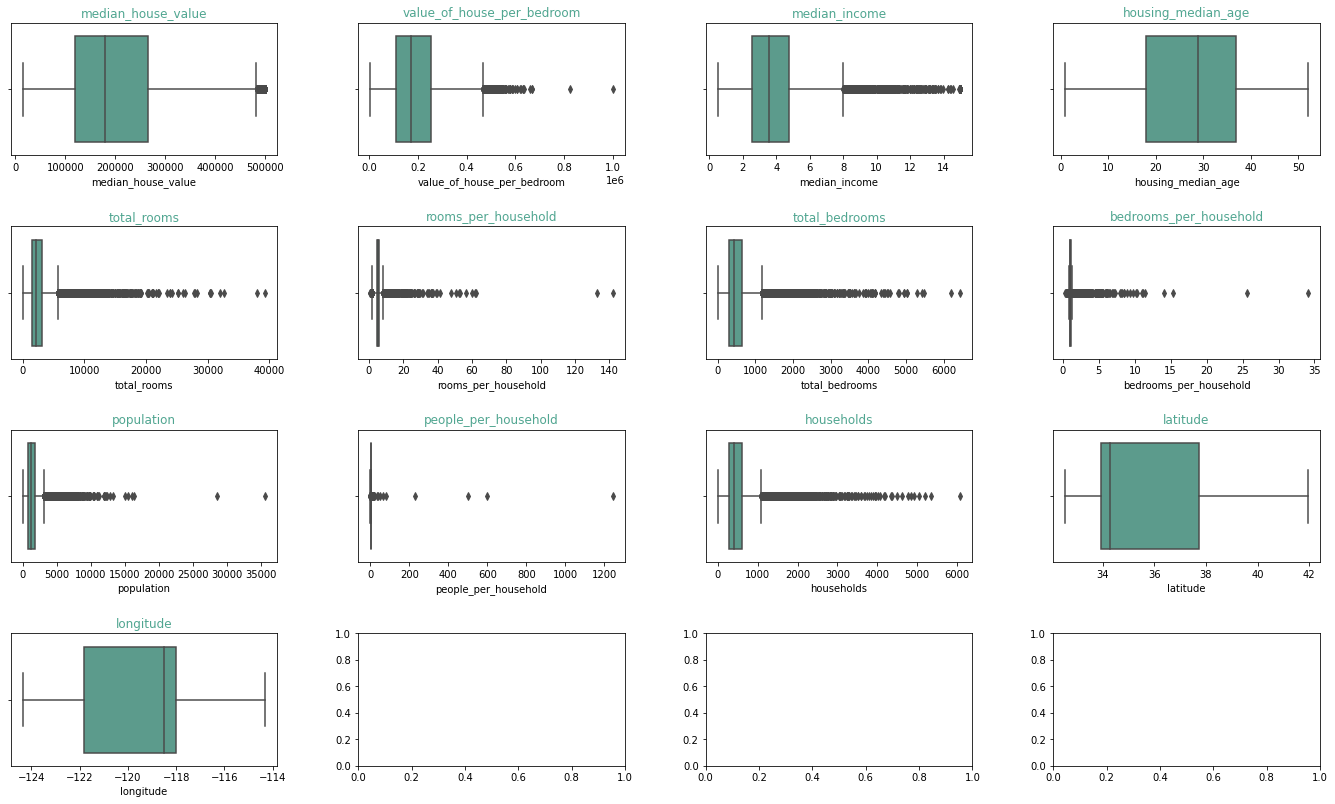

In [ ]:
plot_distributions(houses_normalised, houses_normalised.columns, type='boxplot')

plotting columns ['median_house_value', 'value_of_house_per_bedroom', 'median_income', 'housing_median_age', 'total_rooms', 'rooms_per_household', 'total_bedrooms', 'bedrooms_per_household', 'population', 'people_per_household', 'households', 'latitude', 'longitude']


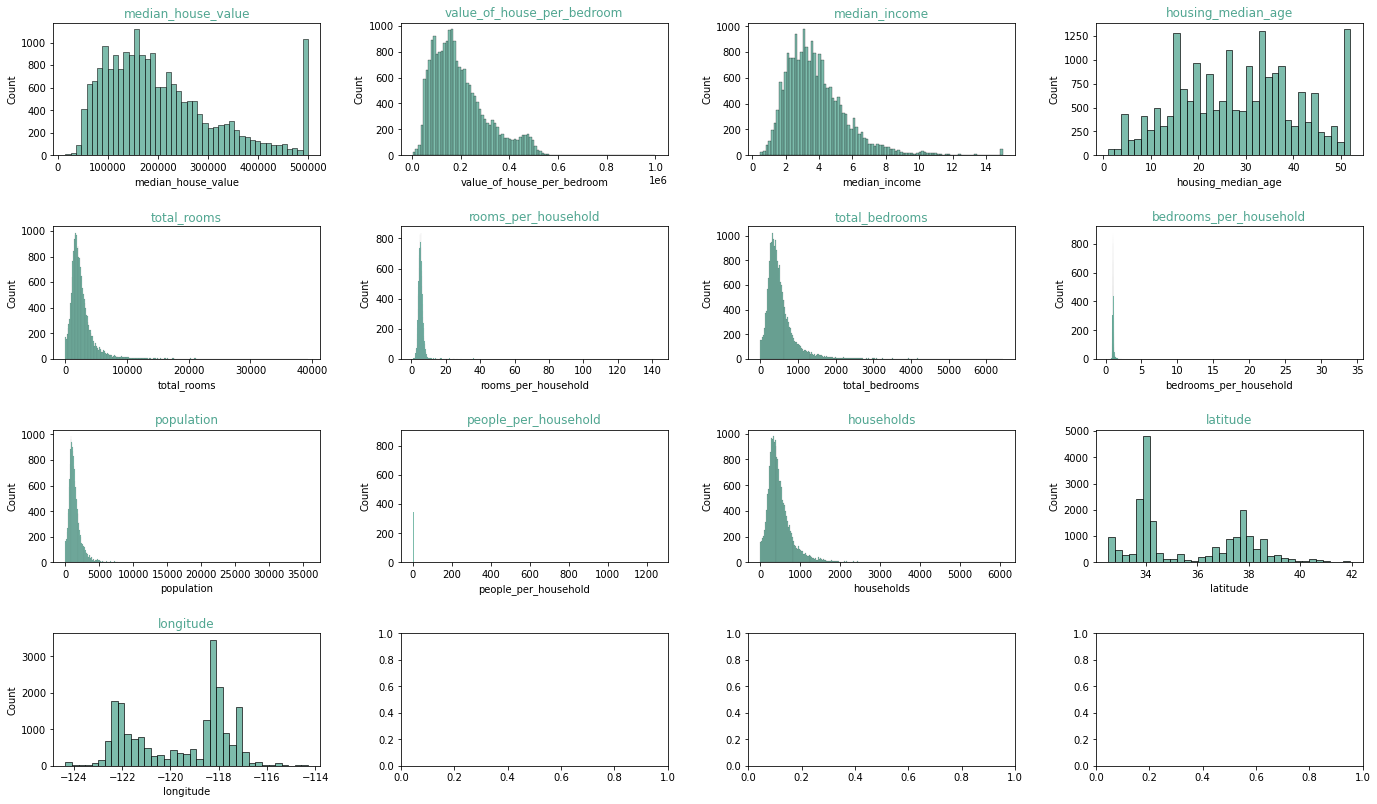

In [ ]:
plot_distributions(houses_normalised, houses_normalised.columns, type='histplot')

From the distribution of data as visualised in the graphs above, it is clear that outliers are present given the limits of the various x-axes and that lack of visible data in large areas of some of the subplots.

### Understand the correlations between features

<ipython-input-11-46346e712272>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(houses_normalised.corr(method='pearson', min_periods=1), dtype=np.bool))


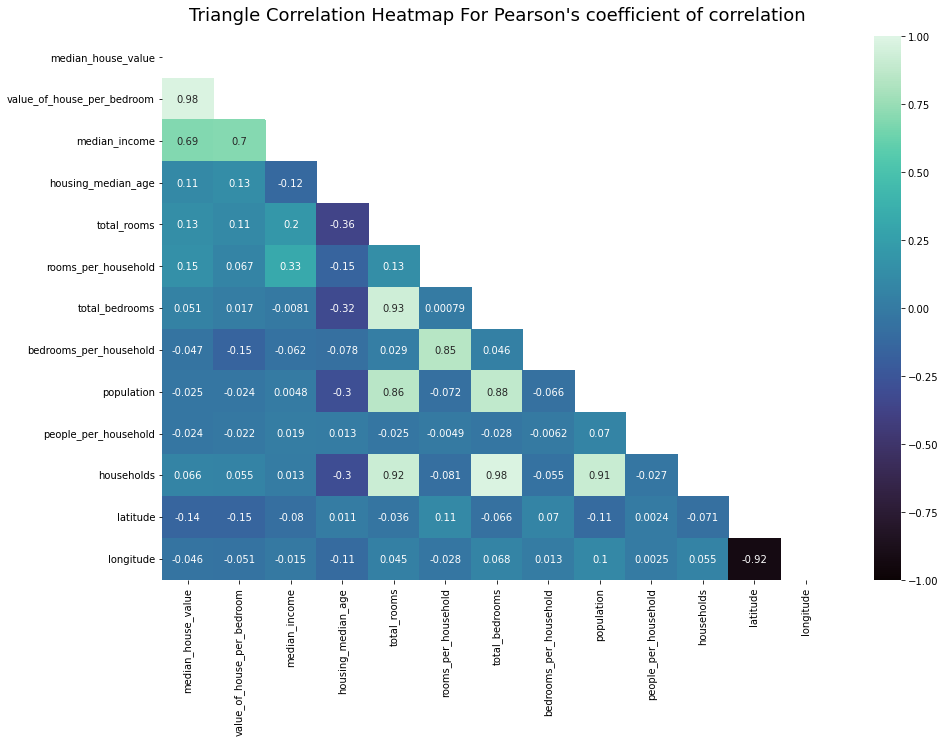

In [ ]:
import numpy as np

colour = sns.color_palette("mako", as_cmap=True)

plt.figure(figsize=(15, 10))

# makes correlation heatmap triangular to remove duplicate values
mask = np.triu(np.ones_like(houses_normalised.corr(method='pearson', min_periods=1), dtype=np.bool))

correlationr = sns.heatmap(houses_normalised.corr(method='pearson', min_periods=1), mask=mask, vmin=-1, vmax=1, annot=True, cmap=colour)
correlationr.set_title("Triangle Correlation Heatmap For Pearson's coefficient of correlation", fontdict={'fontsize':18}, pad=16);

display(correlationr)

From this correlation heatmp we can conclude that the following features have a strong relationship:

* median income & median house value
* median income & value of house per bedroom
* total rooms & total bedrooms
* bedrooms per household & rooms per household
* population & total rooms
* population & total bedrooms
* households & total rooms
* households & total bedrooms
* households & population
* longitude & latitude

## Record Identification

Here, I shall idenify outliers within the dataset. As we have no ground truth, I am going to identify records that I believe to be outliers and these will be my equivalent of ground truth. I will then compare the results of this with the equivalent using KNN and LOF anomaly detection.

The 'ground truth' outliers will be defined as such:
* where **households > total rooms** 
  * It should not be possible to have more households than total rooms as a household must have at least one room to be classed as a household, otherwise it is not even a building.

* where **bedrooms per household < 0.9** 
  * This would mean that some houses don't have a bedroom which can perhaps be expected for accomodation such as flats but generally most households should have at least one bedroom).

* where **rooms per household < 1** 
  * Otherwise, this would indicate that some houses in a given region do not have a room and thus in my defintiion of a household, it cannot be a household without having at least one room.

* where **total bedrooms > total rooms** 
  * It should not be possible to have more bedrooms than rooms as bedrooms is a subset of rooms.

* where **rooms per household > 14**
  * Set based on boxplot.

* where **bedrooms per household > 8**
 * Set based on boxplot.

* where **median house value < 20,000**
 * Set based on boxplot.

* where **value of house per bedroom < 20,000**
 * Set based on boxplot.

* where **people per household > 8**
 * Set based on boxplot.

In [ ]:
# Locate all the records that suffice/meet the above criteria 
houses_outliers = houses_normalised.loc[(houses_normalised['households'] > houses_normalised['total_rooms']) |
                                        (houses_normalised['bedrooms_per_household'] < 0.9) | 
                                        (houses_normalised['rooms_per_household'] < 1) |
                                        (houses_normalised['total_bedrooms'] > houses_normalised['total_rooms']) |
                                        (houses_normalised['rooms_per_household'] > 14 ) |
                                        (houses_normalised['bedrooms_per_household'] > 8) | 
                                        (houses_normalised['median_house_value'] < 20000) | 
                                        (houses_normalised['value_of_house_per_bedroom'] < 20000) |
                                        (houses_normalised['people_per_household'] > 8)]
houses_outliers

,median_house_value,value_of_house_per_bedroom,median_income,housing_median_age,total_rooms,rooms_per_household,total_bedrooms,bedrooms_per_household,population,people_per_household,households,latitude,longitude
59,60000.0,79534.883721,2.5625,2.0,158.0,2.771930,43.0,0.754386,94.0,1.649123,57.0,37.82,-122.29
73,67500.0,118125.000000,0.4999,46.0,12.0,1.714286,4.0,0.571429,18.0,2.571429,7.0,37.81,-122.29
91,137500.0,139080.459770,0.8668,52.0,215.0,2.443182,87.0,0.988636,904.0,10.272727,88.0,37.80,-122.28
140,483300.0,661357.894737,6.3624,30.0,292.0,5.615385,38.0,0.730769,126.0,2.423077,52.0,37.81,-122.18
192,75000.0,95930.232558,2.1000,51.0,175.0,3.181818,43.0,0.781818,228.0,4.145455,55.0,37.79,-122.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20501,335000.0,374411.764706,6.5483,20.0,1586.0,7.588517,187.0,0.894737,699.0,3.344498,209.0,34.30,-118.71
20522,73100.0,81571.854305,3.0536,36.0,1672.0,4.961424,302.0,0.896142,969.0,2.875371,337.0,38.54,-121.54
20527,310000.0,304561.403509,1.4653,7.0,1777.0,3.525794,513.0,1.017857,4479.0,8.886905,504.0,38.54,-121.79
20583,137500.0,156081.081081,3.8750,31.0,371.0,4.416667,74.0,0.880952,208.0,2.476190,84.0,38.73,-122.00


Here, I have identified 565 outliers. This is my ground truth.

I will now create a copy of the houses dataset with the outliers removed.

In [ ]:
# create new houses_inliers dataframe containing all non-outlier entries
houses_inliers = houses_normalised.copy()
houses_inliers = pd.merge(houses_inliers, houses_outliers, how="outer", indicator=True)
houses_inliers = houses_inliers.loc[(houses_inliers['_merge'] == 'left_only')].drop('_merge',axis=1)
houses_inliers

,median_house_value,value_of_house_per_bedroom,median_income,housing_median_age,total_rooms,rooms_per_household,total_bedrooms,bedrooms_per_household,population,people_per_household,households,latitude,longitude
0,452600.0,442074.418605,8.3252,41.0,880.0,6.984127,129.0,1.023810,322.0,2.555556,126.0,37.88,-122.23
1,358500.0,368872.513562,8.3014,21.0,7099.0,6.238137,1106.0,0.971880,2401.0,2.109842,1138.0,37.86,-122.22
2,352100.0,328008.947368,7.2574,52.0,1467.0,8.288136,190.0,1.073446,496.0,2.802260,177.0,37.85,-122.24
3,341300.0,318062.553191,5.6431,52.0,1274.0,5.817352,235.0,1.073059,558.0,2.547945,219.0,37.85,-122.25
4,342200.0,316535.000000,3.8462,52.0,1627.0,6.281853,280.0,1.081081,565.0,2.181467,259.0,37.85,-122.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,68911.764706,1.5603,25.0,1665.0,5.045455,374.0,1.133333,845.0,2.560606,330.0,39.48,-121.09
20636,77100.0,58596.000000,2.5568,18.0,697.0,6.114035,150.0,1.315789,356.0,3.122807,114.0,39.49,-121.21
20637,92300.0,82403.917526,1.7000,17.0,2254.0,5.205543,485.0,1.120092,1007.0,2.325635,433.0,39.43,-121.22
20638,84700.0,72274.572127,1.8672,18.0,1860.0,5.329513,409.0,1.171920,741.0,2.123209,349.0,39.43,-121.32


To check everything adds up correctly...

In [ ]:
print("Total number of entries:                " + str(len(houses_normalised)))
print("Predicted number of inlying entries:    " + str(len(houses_inliers)))
print("Predicted number of outlying entries:   " + str(len(houses_outliers)))

if(len(houses_inliers) + len(houses_outliers) == len(houses_normalised)):
  print("It all adds up!")

Total number of entries:                20640
Predicted number of inlying entries:    20075
Predicted number of outlying entries:   565
It all adds up!


**Visualise the predicted inlying entries and check whether or not you can identify any additional outliers.**

plotting columns ['median_house_value', 'value_of_house_per_bedroom', 'median_income', 'housing_median_age', 'total_rooms', 'rooms_per_household', 'total_bedrooms', 'bedrooms_per_household', 'population', 'people_per_household', 'households', 'latitude', 'longitude']


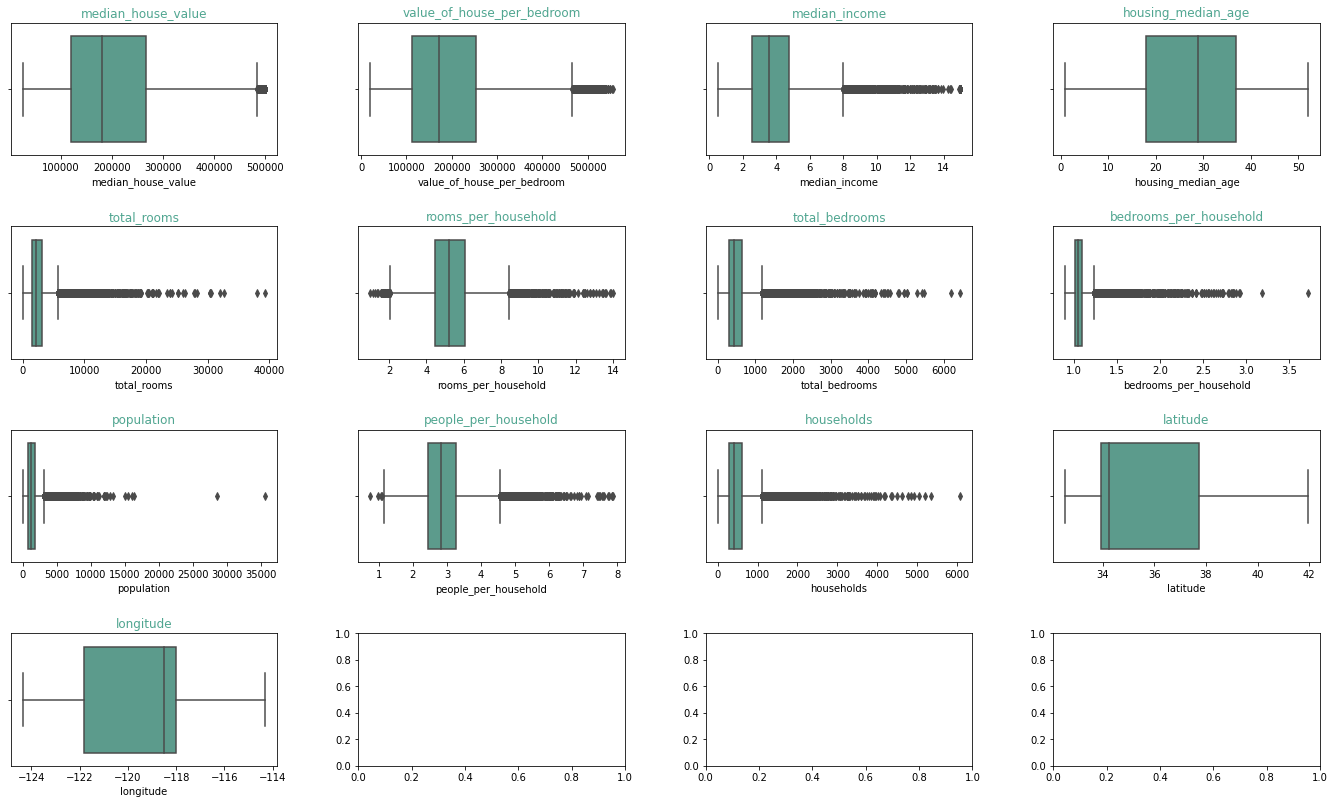

In [ ]:
plot_distributions(houses_inliers, houses_inliers.columns, type='boxplot')

plotting columns ['median_house_value', 'value_of_house_per_bedroom', 'median_income', 'housing_median_age', 'total_rooms', 'rooms_per_household', 'total_bedrooms', 'bedrooms_per_household', 'population', 'people_per_household', 'households', 'latitude', 'longitude']


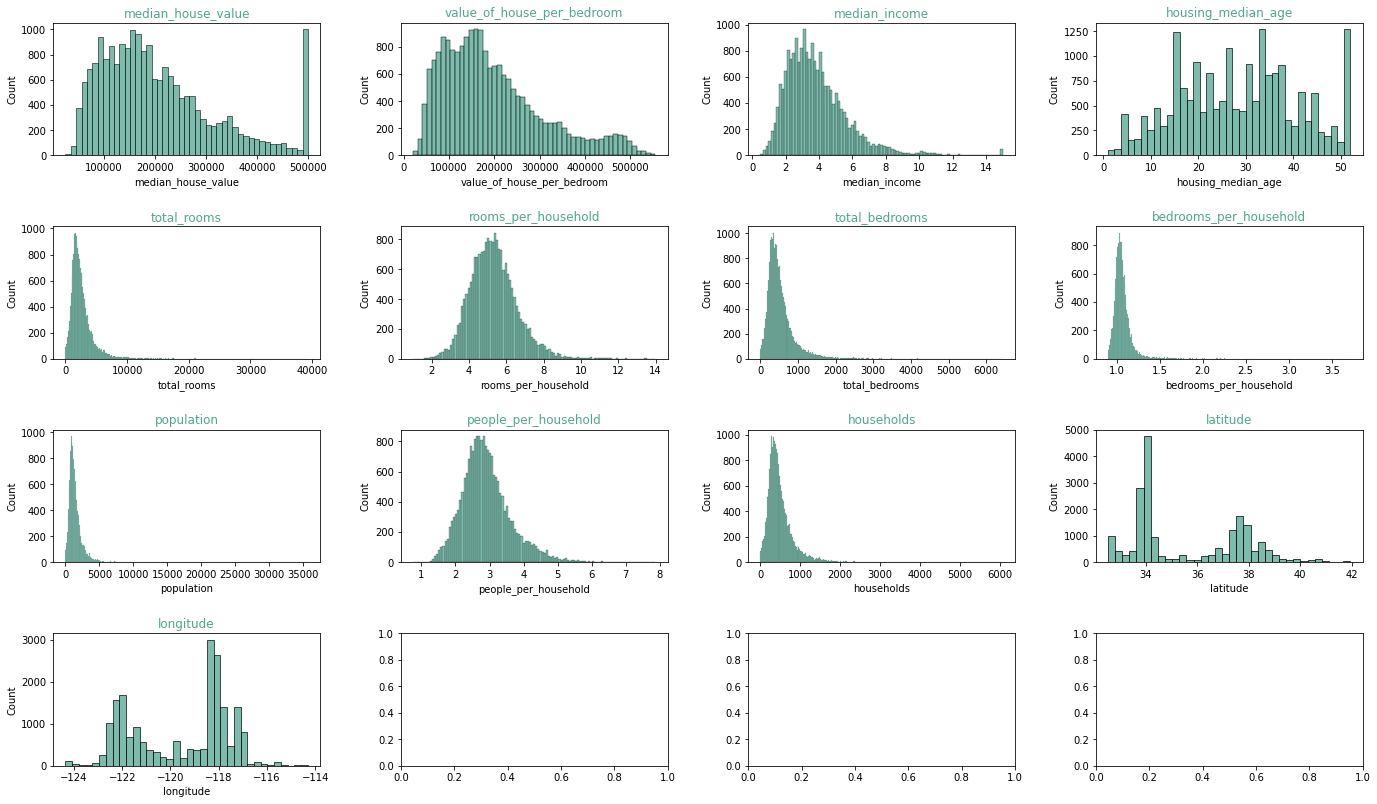

In [ ]:
plot_distributions(houses_inliers, houses_inliers.columns, type='histplot')

Having looked over the visualisations above, I could arguably lower the thresholds of rooms per household to 12, people per household to 6 or 7 and bedrooms per household to 2.0 but in doing so I fear losing valid data and so will leave it as it is. 

## Using LOF and KNN to see if the results align with empirical anlysis

## KNN Outlier Detection

In [ ]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=20)
nbrs.fit(houses_normalised)

NearestNeighbors(n_neighbors=20)

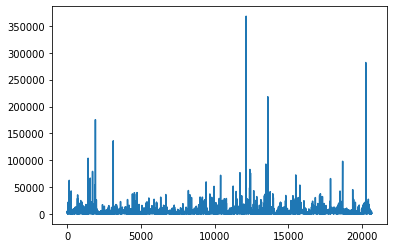

In [ ]:
distances, indexes = nbrs.kneighbors(houses_normalised)
plt.plot(distances.mean(axis=1))

I chose a threshold value of 10,000 here as it removes the extreme outliers, once again I did not want to remove too many potentially valid data points so went on the side of caution.

In [ ]:
knn_outlier_index = np.where(distances.mean(axis=1) > 10000)
knn_outlier_values = houses_normalised.iloc[knn_outlier_index]
knn_outlier_values

,median_house_value,value_of_house_per_bedroom,median_income,housing_median_age,total_rooms,rooms_per_household,total_bedrooms,bedrooms_per_household,population,people_per_household,households,latitude,longitude
73,67500.0,118125.000000,0.4999,46.0,12.0,1.714286,4.0,0.571429,18.0,2.571429,7.0,37.81,-122.29
140,483300.0,661357.894737,6.3624,30.0,292.0,5.615385,38.0,0.730769,126.0,2.423077,52.0,37.81,-122.18
270,225000.0,341129.032258,3.8750,33.0,142.0,3.021277,31.0,0.659574,575.0,12.234043,47.0,37.78,-122.18
490,446200.0,471897.382199,7.0897,52.0,1389.0,6.876238,191.0,0.945545,514.0,2.544554,202.0,37.86,-122.25
545,372000.0,416103.092784,5.5337,52.0,2252.0,5.188940,388.0,0.894009,1033.0,2.380184,434.0,37.77,-122.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20423,428600.0,284754.794521,5.4346,17.0,1822.0,6.261168,438.0,1.505155,578.0,1.986254,291.0,34.08,-119.00
20424,357600.0,291872.485207,6.6122,4.0,16704.0,7.568645,2704.0,1.225193,6187.0,2.803353,2207.0,34.18,-118.75
20440,308100.0,277543.525336,6.4963,6.0,16222.0,7.799038,2309.0,1.110096,6700.0,3.221154,2080.0,34.24,-118.77
20451,321300.0,317376.143141,6.9712,5.0,25187.0,7.241806,3521.0,1.012363,11956.0,3.437608,3478.0,34.26,-118.90


In [ ]:
print("Number of KNN predicted outliers: " + str(len(knn_outlier_values)))

Number of KNN predicted outliers: 618


### Compare the Manually Predicted "Ground Truth" Outliers to the KNN Predicted Outliers

In [ ]:
print("Number of manually predicted 'ground truth' outliers: " + str(len(houses_outliers)))
print("Number of KNN predicted outliers: " + str(len(knn_outlier_values)))

Number of manually predicted 'ground truth' outliers: 565
Number of KNN predicted outliers: 618


In [ ]:
# Combine the KNN outliers and the manually predicted outliers into a df
knn_compare = pd.merge(knn_outlier_values, houses_outliers, how="outer", indicator=True)

# The entries that both the manual process and the KNN process agree to be outliers
knn_agreed = knn_compare.loc[(knn_compare['_merge'] == 'both')]
knn_agreed

,median_house_value,value_of_house_per_bedroom,median_income,housing_median_age,total_rooms,rooms_per_household,total_bedrooms,bedrooms_per_household,population,people_per_household,households,latitude,longitude,_merge
0,67500.0,118125.000000,0.4999,46.0,12.0,1.714286,4.0,0.571429,18.0,2.571429,7.0,37.81,-122.29,both
1,483300.0,661357.894737,6.3624,30.0,292.0,5.615385,38.0,0.730769,126.0,2.423077,52.0,37.81,-122.18,both
2,225000.0,341129.032258,3.8750,33.0,142.0,3.021277,31.0,0.659574,575.0,12.234043,47.0,37.78,-122.18,both
4,372000.0,416103.092784,5.5337,52.0,2252.0,5.188940,388.0,0.894009,1033.0,2.380184,434.0,37.77,-122.27,both
8,371200.0,414870.588235,6.5095,25.0,1134.0,6.631579,153.0,0.894737,340.0,1.988304,171.0,37.72,-122.13,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,500001.0,592106.447368,5.2681,21.0,259.0,5.755556,38.0,0.844444,142.0,3.155556,45.0,34.31,-119.17,both
604,275000.0,825000.000000,8.0000,28.0,26.0,2.888889,3.0,0.333333,29.0,3.222222,9.0,34.25,-119.23,both
609,125000.0,164772.727273,7.3004,32.0,166.0,5.724138,22.0,0.758621,63.0,2.172414,29.0,34.17,-119.08,both
610,52500.0,84000.000000,4.0208,8.0,40.0,2.500000,10.0,0.625000,309.0,19.312500,16.0,34.22,-119.09,both


In [ ]:
len(knn_agreed)
print("Number of outliers predicted by both myself and KNN Outlier Detection: " + str(len(knn_agreed)))

Number of outliers predicted by both myself and KNN Outlier Detection: 232


In [ ]:
onlyKNN = knn_compare.loc[(knn_compare['_merge'] == 'left_only')]
print("Number of outliers predicted by KNN Outlier Detection that I did not predict: " + str(len(onlyKNN)))

Number of outliers predicted by KNN Outlier Detection that I did not predict: 386


In [ ]:
onlyManual = knn_compare.loc[(knn_compare['_merge'] == 'right_only')]
print("Number of outliers predicted by myself that KNN Outlier Detection did not predict: " + str(len(onlyManual)))

Number of outliers predicted by myself that KNN Outlier Detection did not predict: 333


In [ ]:
if(len(onlyManual) + len(onlyKNN) + len(knn_agreed) == len(knn_compare)):
  print("It all adds up!")

It all adds up!


In [ ]:
# Create a dataframe which merges the data after manual record identification
# with the data after knn anaomaly detection
# Add a column called 'State of data' and label the data after manual record 
# identification as such and do the same with the data after knn anaomaly 
# detection

# By doing this, I can illustrate the histograms and violinplots below.

# data after manual record identification
# Creating a new DataFrame
ri_inliers =  houses_inliers.copy()
# Adding a new column with same value for each record
manual_value = 'After manual record identification'
ri_inliers.insert(len(ri_inliers.columns),'State of data',manual_value)

# data after knn anaomaly detection
# Creating a new DataFrame
# create new knn_inliers dataframe containing all non-outlier entries after knn 
# anomaly detection
knn_inliers = houses_normalised.copy()
knn_inliers = pd.merge(knn_inliers, knn_outlier_values, how="outer", indicator=True)
knn_inliers = knn_inliers.loc[(knn_inliers['_merge'] == 'left_only')].drop('_merge',axis=1)

# Adding a new column with same value for each record
knn_value = 'After KNN anomaly detection'
knn_inliers.insert(len(knn_inliers.columns),'State of data',knn_value)

# merge the two datasets together
knn_ground_truth = pd.merge(ri_inliers, knn_inliers, how="outer", indicator=False)
knn_ground_truth

,median_house_value,value_of_house_per_bedroom,median_income,housing_median_age,total_rooms,rooms_per_household,total_bedrooms,bedrooms_per_household,population,people_per_household,households,latitude,longitude,State of data
0,452600.0,442074.418605,8.3252,41.0,880.0,6.984127,129.0,1.023810,322.0,2.555556,126.0,37.88,-122.23,After manual record identification
1,358500.0,368872.513562,8.3014,21.0,7099.0,6.238137,1106.0,0.971880,2401.0,2.109842,1138.0,37.86,-122.22,After manual record identification
2,352100.0,328008.947368,7.2574,52.0,1467.0,8.288136,190.0,1.073446,496.0,2.802260,177.0,37.85,-122.24,After manual record identification
3,341300.0,318062.553191,5.6431,52.0,1274.0,5.817352,235.0,1.073059,558.0,2.547945,219.0,37.85,-122.25,After manual record identification
4,342200.0,316535.000000,3.8462,52.0,1627.0,6.281853,280.0,1.081081,565.0,2.181467,259.0,37.85,-122.25,After manual record identification
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40092,78100.0,68911.764706,1.5603,25.0,1665.0,5.045455,374.0,1.133333,845.0,2.560606,330.0,39.48,-121.09,After KNN anomaly detection
40093,77100.0,58596.000000,2.5568,18.0,697.0,6.114035,150.0,1.315789,356.0,3.122807,114.0,39.49,-121.21,After KNN anomaly detection
40094,92300.0,82403.917526,1.7000,17.0,2254.0,5.205543,485.0,1.120092,1007.0,2.325635,433.0,39.43,-121.22,After KNN anomaly detection
40095,84700.0,72274.572127,1.8672,18.0,1860.0,5.329513,409.0,1.171920,741.0,2.123209,349.0,39.43,-121.32,After KNN anomaly detection


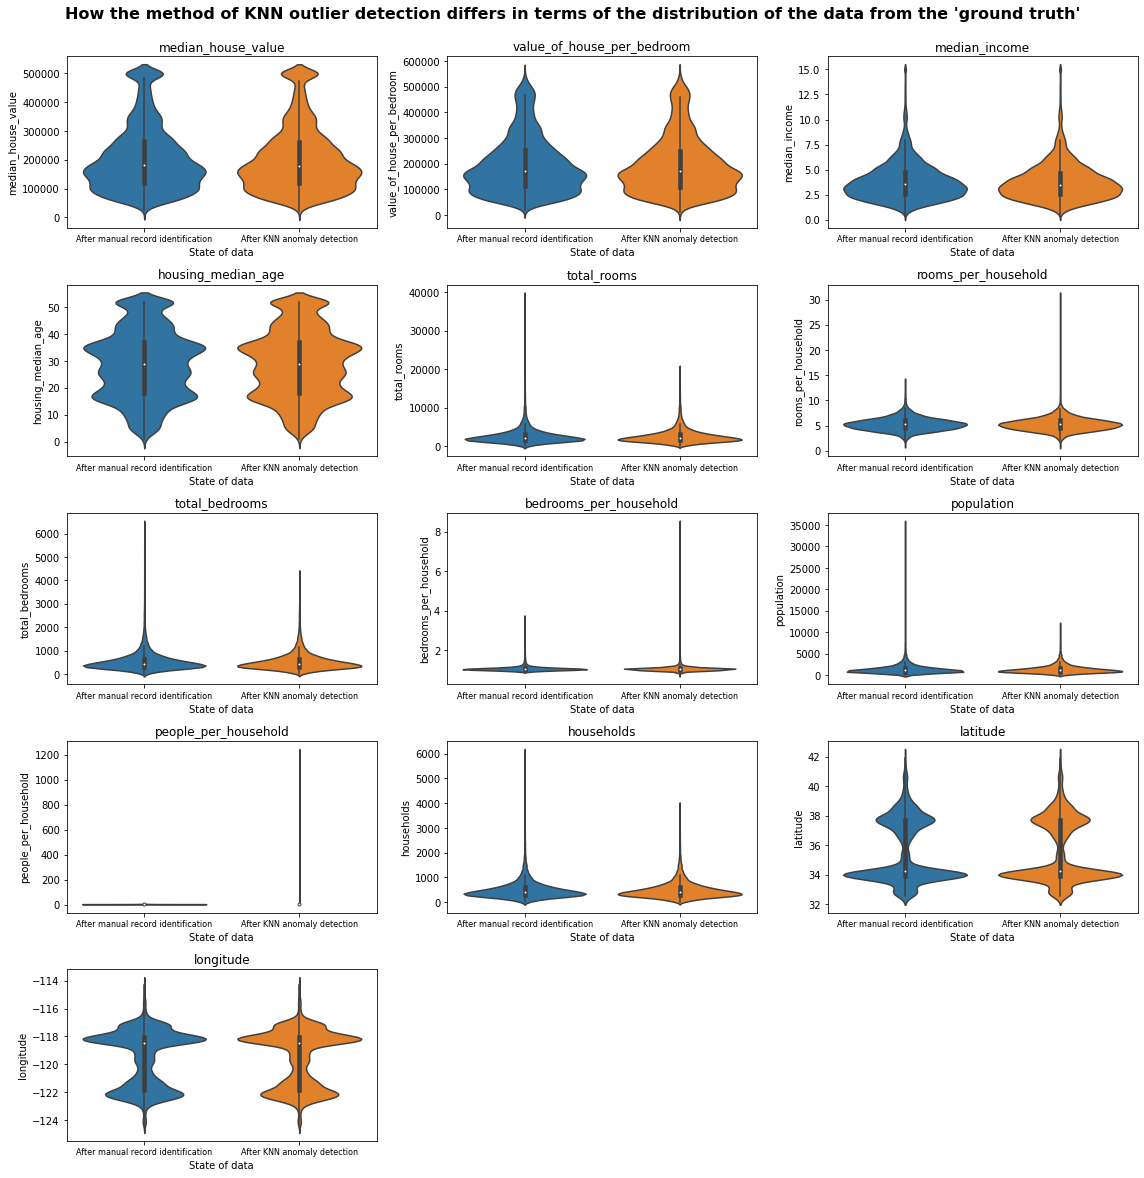

In [ ]:
# plot violin plots for each feature using the data after having performed 
# manual record identification and the data after having performed knn anomaly
# detection

index = 1
fig = plt.figure(figsize = (16,16))
fig.suptitle("How the method of KNN outlier detection differs in terms of the distribution of the data from the 'ground truth'", fontsize=16, fontweight='bold', y=1.02)

for i in houses_normalised.columns:
  plt.subplot(5,3, index)
  sns.violinplot(data=knn_ground_truth, x='State of data', y=knn_ground_truth[i])
  plt.title(i)
  plt.xticks(fontsize=8)
  index = index + 1
plt.tight_layout()
plt.show()

## Local Outlier Factor 

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors = 20)
pred = lof.fit_predict(houses_normalised)
pred
lof_outlier_index = np.where(pred == -1)

In [ ]:
lof_outlier_values = houses_normalised.iloc[lof_outlier_index]
lof_outlier_values

,median_house_value,value_of_house_per_bedroom,median_income,housing_median_age,total_rooms,rooms_per_household,total_bedrooms,bedrooms_per_household,population,people_per_household,households,latitude,longitude
59,60000.0,79534.883721,2.5625,2.0,158.0,2.771930,43.0,0.754386,94.0,1.649123,57.0,37.82,-122.29
73,67500.0,118125.000000,0.4999,46.0,12.0,1.714286,4.0,0.571429,18.0,2.571429,7.0,37.81,-122.29
140,483300.0,661357.894737,6.3624,30.0,292.0,5.615385,38.0,0.730769,126.0,2.423077,52.0,37.81,-122.18
192,75000.0,95930.232558,2.1000,51.0,175.0,3.181818,43.0,0.781818,228.0,4.145455,55.0,37.79,-122.25
270,225000.0,341129.032258,3.8750,33.0,142.0,3.021277,31.0,0.659574,575.0,12.234043,47.0,37.78,-122.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20544,219400.0,216446.311255,2.0650,23.0,8800.0,4.803493,1857.0,1.013646,6330.0,3.455240,1832.0,38.55,-121.76
20563,132500.0,118346.590909,3.1250,9.0,12139.0,5.148007,2640.0,1.119593,6837.0,2.899491,2358.0,38.67,-121.75
20567,165000.0,166254.752852,5.3064,15.0,6809.0,6.423585,1052.0,0.992453,3060.0,2.886792,1060.0,38.66,-121.79
20603,59600.0,54813.320274,1.3375,18.0,4289.0,4.567625,1021.0,1.087327,2707.0,2.882854,939.0,39.13,-121.54


In [ ]:
print("Number of LOF predicted outliers: " + str(len(lof_outlier_values)))

Number of LOF predicted outliers: 599


### Compare the Manually Predicted "Ground Truth" Outliers to the LOF Predicted Outliers

In [ ]:
print("Number of manually predicted outliers: " + str(len(houses_outliers)))
print("Number of LOF predicted outliers:      " + str(len(lof_outlier_values)))

Number of manually predicted outliers: 565
Number of LOF predicted outliers:      599


In [ ]:
# Combine the LOF outliers and the manually predicted outliers into a df
lof_compare = pd.merge(lof_outlier_values, houses_outliers, how="outer", indicator=True)

# The entries that both the manual process and the LOF process agree to be outliers
lof_agreed = lof_compare.loc[(lof_compare['_merge'] == 'both')]
lof_agreed

,median_house_value,value_of_house_per_bedroom,median_income,housing_median_age,total_rooms,rooms_per_household,total_bedrooms,bedrooms_per_household,population,people_per_household,households,latitude,longitude,_merge
0,60000.0,79534.883721,2.5625,2.0,158.0,2.771930,43.0,0.754386,94.0,1.649123,57.0,37.82,-122.29,both
1,67500.0,118125.000000,0.4999,46.0,12.0,1.714286,4.0,0.571429,18.0,2.571429,7.0,37.81,-122.29,both
2,483300.0,661357.894737,6.3624,30.0,292.0,5.615385,38.0,0.730769,126.0,2.423077,52.0,37.81,-122.18,both
3,75000.0,95930.232558,2.1000,51.0,175.0,3.181818,43.0,0.781818,228.0,4.145455,55.0,37.79,-122.25,both
4,225000.0,341129.032258,3.8750,33.0,142.0,3.021277,31.0,0.659574,575.0,12.234043,47.0,37.78,-122.18,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,100000.0,122222.222222,4.3750,16.0,108.0,4.909091,18.0,0.818182,54.0,2.454545,22.0,37.91,-120.32,both
575,500001.0,562501.125000,12.6320,5.0,403.0,7.462963,48.0,0.888889,208.0,3.851852,54.0,34.44,-119.31,both
576,275000.0,825000.000000,8.0000,28.0,26.0,2.888889,3.0,0.333333,29.0,3.222222,9.0,34.25,-119.23,both
586,125000.0,164772.727273,7.3004,32.0,166.0,5.724138,22.0,0.758621,63.0,2.172414,29.0,34.17,-119.08,both


In [ ]:
print("Number of outliers predicted by both myself and LOF Outlier Detection: " + str(len(lof_agreed)))

Number of outliers predicted by both myself and LOF Outlier Detection: 169


In [ ]:
onlyLOF = lof_compare.loc[(lof_compare['_merge'] == 'left_only')]
print("Number of outliers predicted by LOF Outlier Detection that I did not predict: " + str(len(onlyLOF)))

Number of outliers predicted by LOF Outlier Detection that I did not predict: 430


In [ ]:
onlyManual = lof_compare.loc[(lof_compare['_merge'] == 'right_only')]
print("Number of outliers predicted by myself that LOF Outlier Detection did not predict: " + str(len(onlyManual)))

Number of outliers predicted by myself that LOF Outlier Detection did not predict: 396


In [ ]:
if(len(onlyManual) + len(onlyLOF) + len(lof_agreed) == len(lof_compare)):
  print("It all adds up!")

It all adds up!


In [ ]:
# Create a dataframe which merges the data after manual record identification
# with the data after lof anaomaly detection
# Add a column called 'State of data' and label the data after manual record 
# identification as such and the same with the data after lof anomaly detection

# By doing this, I can illustrate the histograms and violinplots below.

# data after manual record identification
# Creating a new DataFrame
ri_inliers =  houses_inliers.copy()
# Adding a new column with same value for each record
manual_value = 'After manual record identification'
ri_inliers.insert(len(ri_inliers.columns),'State of data',manual_value)

# data after lof anaomaly detection
# Creating a new DataFrame
# create new lof_inliers dataframe containing all non-outlier entries after lof anomaly detection
lof_inliers = houses_normalised.copy()
lof_inliers = pd.merge(lof_inliers, lof_outlier_values, how="outer", indicator=True)
lof_inliers = lof_inliers.loc[(lof_inliers['_merge'] == 'left_only')].drop('_merge',axis=1)

# Adding a new column with same value for each record
lof_value = 'After LOF anomaly detection'
lof_inliers.insert(len(lof_inliers.columns),'State of data',lof_value)

# merge the two datasets together
lof_ground_truth = pd.merge(ri_inliers, lof_inliers, how="outer", indicator=False)
lof_ground_truth

,median_house_value,value_of_house_per_bedroom,median_income,housing_median_age,total_rooms,rooms_per_household,total_bedrooms,bedrooms_per_household,population,people_per_household,households,latitude,longitude,State of data
0,452600.0,442074.418605,8.3252,41.0,880.0,6.984127,129.0,1.023810,322.0,2.555556,126.0,37.88,-122.23,After manual record identification
1,358500.0,368872.513562,8.3014,21.0,7099.0,6.238137,1106.0,0.971880,2401.0,2.109842,1138.0,37.86,-122.22,After manual record identification
2,352100.0,328008.947368,7.2574,52.0,1467.0,8.288136,190.0,1.073446,496.0,2.802260,177.0,37.85,-122.24,After manual record identification
3,341300.0,318062.553191,5.6431,52.0,1274.0,5.817352,235.0,1.073059,558.0,2.547945,219.0,37.85,-122.25,After manual record identification
4,342200.0,316535.000000,3.8462,52.0,1627.0,6.281853,280.0,1.081081,565.0,2.181467,259.0,37.85,-122.25,After manual record identification
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40111,78100.0,68911.764706,1.5603,25.0,1665.0,5.045455,374.0,1.133333,845.0,2.560606,330.0,39.48,-121.09,After LOF anomaly detection
40112,77100.0,58596.000000,2.5568,18.0,697.0,6.114035,150.0,1.315789,356.0,3.122807,114.0,39.49,-121.21,After LOF anomaly detection
40113,92300.0,82403.917526,1.7000,17.0,2254.0,5.205543,485.0,1.120092,1007.0,2.325635,433.0,39.43,-121.22,After LOF anomaly detection
40114,84700.0,72274.572127,1.8672,18.0,1860.0,5.329513,409.0,1.171920,741.0,2.123209,349.0,39.43,-121.32,After LOF anomaly detection


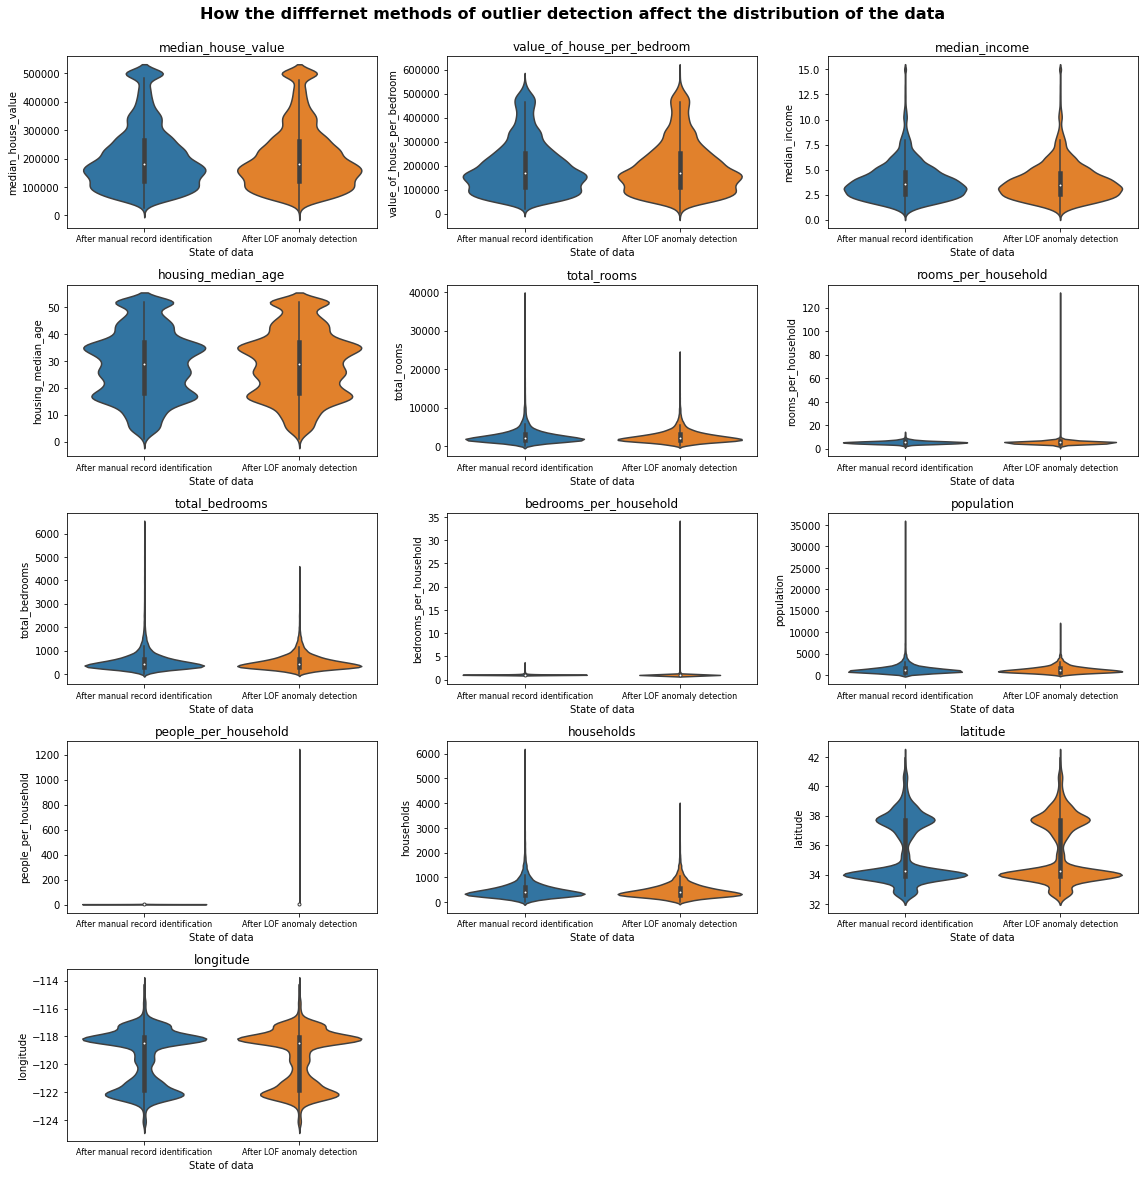

In [ ]:
# plot violin plots for each feature using data after both manual record
# identification and lof anomaly detection

index = 1
fig = plt.figure(figsize = (16,16))
fig.suptitle('How the difffernet methods of outlier detection affect the distribution of the data', fontsize=16, fontweight='bold', y=1.02)

for i in houses_normalised.columns:
  plt.subplot(5,3, index)
  sns.violinplot(data=lof_ground_truth, x='State of data', y=lof_ground_truth[i])
  plt.title(i)
  plt.xticks(fontsize=8)
  index = index + 1
plt.tight_layout()
plt.show()

## Comparing KNN results vs LOF results

In [ ]:
print("Number of KNN predicted outliers: " + str(len(knn_outlier_values)))
print("Number of LOF predicted outliers: " + str(len(lof_outlier_values)))

Number of KNN predicted outliers: 618
Number of LOF predicted outliers: 599


In [ ]:
knn_lof_compare = pd.merge(lof_outlier_values, knn_outlier_values, how="outer", indicator=True)

# The entries that both the KNN and the LOF process agree to be outliers
knn_lof_agreed = knn_lof_compare.loc[(knn_lof_compare['_merge'] == 'both')]
knn_lof_agreed

,median_house_value,value_of_house_per_bedroom,median_income,housing_median_age,total_rooms,rooms_per_household,total_bedrooms,bedrooms_per_household,population,people_per_household,households,latitude,longitude,_merge
1,67500.0,118125.000000,0.4999,46.0,12.0,1.714286,4.0,0.571429,18.0,2.571429,7.0,37.81,-122.29,both
2,483300.0,661357.894737,6.3624,30.0,292.0,5.615385,38.0,0.730769,126.0,2.423077,52.0,37.81,-122.18,both
4,225000.0,341129.032258,3.8750,33.0,142.0,3.021277,31.0,0.659574,575.0,12.234043,47.0,37.78,-122.18,both
8,350700.0,330399.514731,7.6110,5.0,18634.0,6.855776,2885.0,1.061442,7427.0,2.732524,2718.0,37.72,-122.24,both
9,341600.0,335252.420538,7.2634,12.0,14316.0,7.133034,2045.0,1.018934,5781.0,2.880419,2007.0,37.77,-122.06,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,125000.0,164772.727273,7.3004,32.0,166.0,5.724138,22.0,0.758621,63.0,2.172414,29.0,34.17,-119.08,both
587,52500.0,84000.000000,4.0208,8.0,40.0,2.500000,10.0,0.625000,309.0,19.312500,16.0,34.22,-119.09,both
588,357600.0,291872.485207,6.6122,4.0,16704.0,7.568645,2704.0,1.225193,6187.0,2.803353,2207.0,34.18,-118.75,both
590,308100.0,277543.525336,6.4963,6.0,16222.0,7.799038,2309.0,1.110096,6700.0,3.221154,2080.0,34.24,-118.77,both


In [ ]:
print("Number of outliers predicted by both KNN and LOF Outlier Detection: " + str(len(knn_lof_agreed)))

Number of outliers predicted by both KNN and LOF Outlier Detection: 200


In [ ]:
onlyLOF = knn_lof_compare.loc[(knn_lof_compare['_merge'] == 'left_only')]
print("Number of outliers predicted by LOF Outlier Detection that KNN did not predict: " + str(len(onlyLOF)))

Number of outliers predicted by LOF Outlier Detection that KNN did not predict: 399


In [ ]:
onlyKNN = knn_lof_compare.loc[(knn_lof_compare['_merge'] == 'right_only')]
print("Number of outliers predicted by KNN that LOF Outlier Detection did not predict: " + str(len(onlyKNN)))

Number of outliers predicted by KNN that LOF Outlier Detection did not predict: 418


In [ ]:
if(len(onlyKNN) + len(onlyLOF) + len(knn_lof_agreed) == len(knn_lof_compare)):
  print("It all adds up!")

It all adds up!


In [ ]:
# merge the data after having performed LOF anomaly detection and the data after 
# having performed KNN anomaly detection together
lof_knn = pd.merge(lof_inliers, knn_inliers, how="outer", indicator=False)
lof_knn

,median_house_value,value_of_house_per_bedroom,median_income,housing_median_age,total_rooms,rooms_per_household,total_bedrooms,bedrooms_per_household,population,people_per_household,households,latitude,longitude,State of data
0,452600.0,442074.418605,8.3252,41.0,880.0,6.984127,129.0,1.023810,322.0,2.555556,126.0,37.88,-122.23,After LOF anomaly detection
1,358500.0,368872.513562,8.3014,21.0,7099.0,6.238137,1106.0,0.971880,2401.0,2.109842,1138.0,37.86,-122.22,After LOF anomaly detection
2,352100.0,328008.947368,7.2574,52.0,1467.0,8.288136,190.0,1.073446,496.0,2.802260,177.0,37.85,-122.24,After LOF anomaly detection
3,341300.0,318062.553191,5.6431,52.0,1274.0,5.817352,235.0,1.073059,558.0,2.547945,219.0,37.85,-122.25,After LOF anomaly detection
4,342200.0,316535.000000,3.8462,52.0,1627.0,6.281853,280.0,1.081081,565.0,2.181467,259.0,37.85,-122.25,After LOF anomaly detection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40058,78100.0,68911.764706,1.5603,25.0,1665.0,5.045455,374.0,1.133333,845.0,2.560606,330.0,39.48,-121.09,After KNN anomaly detection
40059,77100.0,58596.000000,2.5568,18.0,697.0,6.114035,150.0,1.315789,356.0,3.122807,114.0,39.49,-121.21,After KNN anomaly detection
40060,92300.0,82403.917526,1.7000,17.0,2254.0,5.205543,485.0,1.120092,1007.0,2.325635,433.0,39.43,-121.22,After KNN anomaly detection
40061,84700.0,72274.572127,1.8672,18.0,1860.0,5.329513,409.0,1.171920,741.0,2.123209,349.0,39.43,-121.32,After KNN anomaly detection


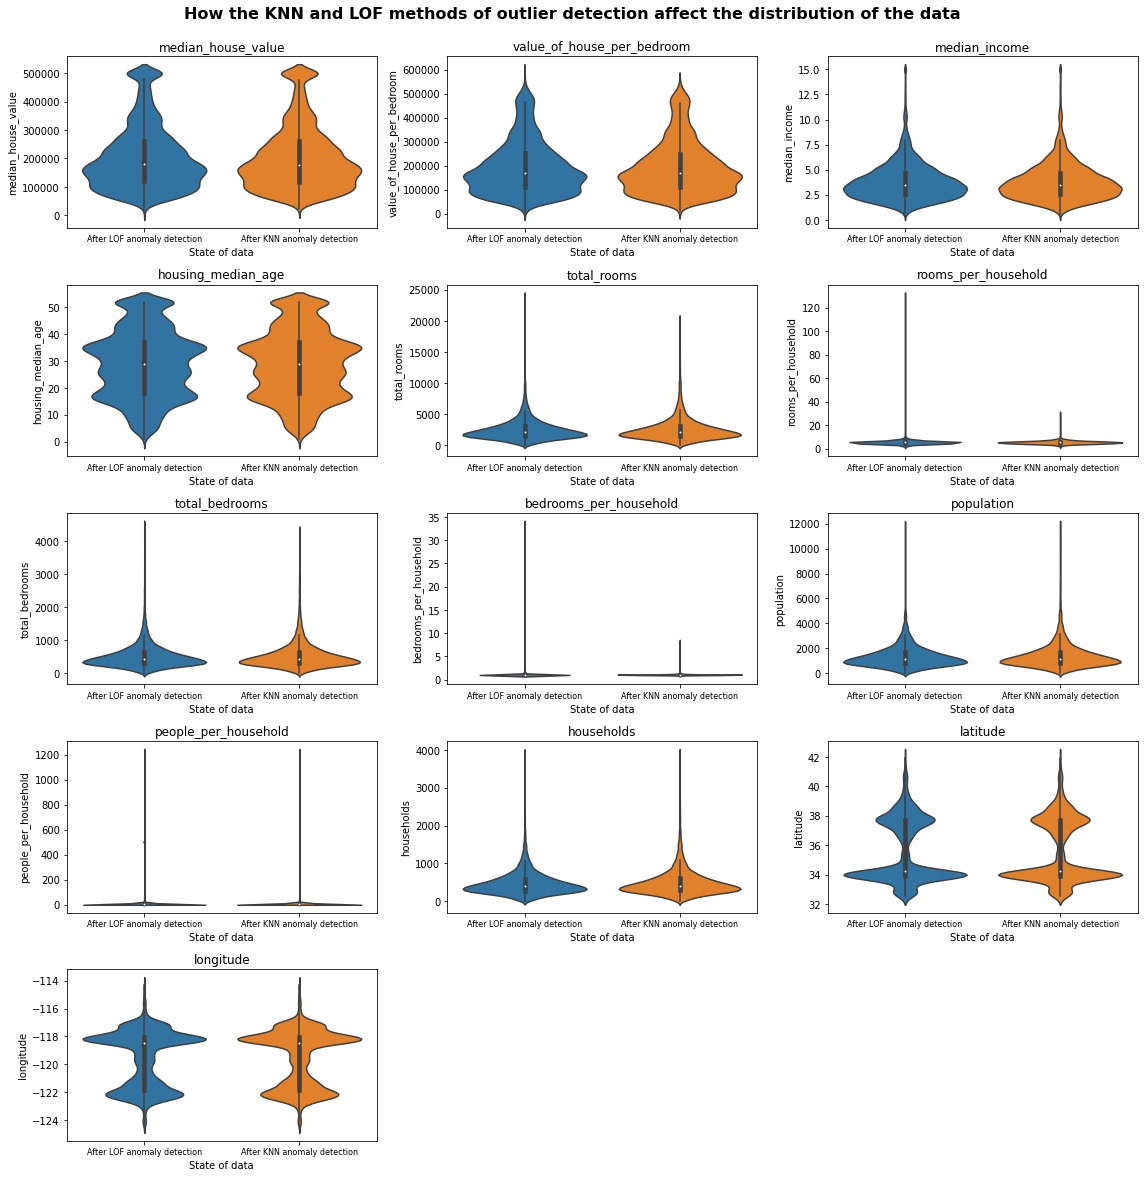

In [ ]:
# plot violin plots for each feature using data after both knn and lof anomaly 
# detection

index = 1
fig = plt.figure(figsize = (16,16))
fig.suptitle('How the KNN and LOF methods of outlier detection affect the distribution of the data', fontsize=16, fontweight='bold', y=1.02)

for i in houses_normalised.columns:
  plt.subplot(5,3, index)
  sns.violinplot(data=lof_knn, x='State of data', y=lof_knn[i])
  plt.title(i)
  plt.xticks(fontsize=8)
  index = index + 1
plt.tight_layout()
plt.show()

## Which records do Manual Record Identification, KNN and LOF agree to be outliers?

In [ ]:
# Combine all records that knn and record identification agreed upon and the records that lof and record identification agreed upon
compare_all = pd.merge(lof_agreed, knn_agreed, how="outer", indicator='Agreed').drop('_merge', axis=1)

# The records that Manual Record Identification, KNN and LOF agree to be outliers
all_agreed = compare_all.loc[(compare_all['Agreed'] == 'both')]
all_agreed

,median_house_value,value_of_house_per_bedroom,median_income,housing_median_age,total_rooms,rooms_per_household,total_bedrooms,bedrooms_per_household,population,people_per_household,households,latitude,longitude,Agreed
1,67500.0,118125.000000,0.4999,46.0,12.0,1.714286,4.0,0.571429,18.0,2.571429,7.0,37.81,-122.29,both
2,483300.0,661357.894737,6.3624,30.0,292.0,5.615385,38.0,0.730769,126.0,2.423077,52.0,37.81,-122.18,both
4,225000.0,341129.032258,3.8750,33.0,142.0,3.021277,31.0,0.659574,575.0,12.234043,47.0,37.78,-122.18,both
6,340000.0,421600.000000,6.5000,20.0,200.0,6.451613,25.0,0.806452,83.0,2.677419,31.0,37.69,-122.03,both
7,182700.0,219789.473684,3.9338,36.0,786.0,4.912500,133.0,0.831250,463.0,2.893750,160.0,37.64,-122.08,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,450000.0,506250.000000,1.7679,39.0,45.0,5.000000,8.0,0.888889,22.0,2.444444,9.0,37.63,-120.92,both
165,500001.0,562501.125000,12.6320,5.0,403.0,7.462963,48.0,0.888889,208.0,3.851852,54.0,34.44,-119.31,both
166,275000.0,825000.000000,8.0000,28.0,26.0,2.888889,3.0,0.333333,29.0,3.222222,9.0,34.25,-119.23,both
167,125000.0,164772.727273,7.3004,32.0,166.0,5.724138,22.0,0.758621,63.0,2.172414,29.0,34.17,-119.08,both


In [ ]:
print("Number of outliers predicted by myself, KNN and LOF Outlier Detection: " + str(len(all_agreed)))

Number of outliers predicted by myself, KNN and LOF Outlier Detection: 109


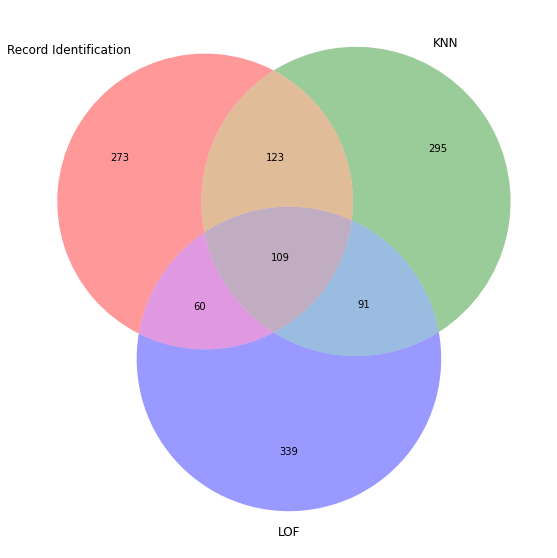

In [ ]:
from matplotlib_venn import venn3


ri = len(houses_outliers) - len(lof_agreed) - len(knn_agreed) + len(all_agreed)
knn = len(knn_outlier_values) - len(knn_lof_agreed) - len(knn_agreed) + len(all_agreed)
lof = len(lof_outlier_values) - len(knn_lof_agreed) - len(lof_agreed) + len(all_agreed)

plt.figure(figsize=(10,10))
venn3(subsets = (ri, knn, len(knn_agreed)-len(all_agreed), lof, len(lof_agreed)-len(all_agreed), len(knn_lof_agreed)-len(all_agreed), len(all_agreed)), set_labels = ('Record Identification', 'KNN', 'LOF'))
plt.show()

## Results & Conclusions

---

**Results:**
* Record identification identified 565 outliers
* KNN Outlier Detection identified 618 outliers
* LOF Outlier Detection identified 599 outliers

Based on the number of outliers identified, it appears that all three methods detected a similar number of outliers, however each method detected a vastly different set of outliers compared to each another:

* Record Identification and KNN Outlier Detection agreed on 232 records being outliers.
* Record Identification and LOF Outlier Detection agreed on 169 records being outliers.
* KNN Outlier Detection and LOF Outlier detection agreed on 200 records being outliers.

**All three methods agree on 109 records being classed as outliers.**

Therefore, we can assume that these 109 records are definitively outliers, but this does not compose the complete set of outliers and thus the rest of the outliers are uncertain.

If we refer to the **record identification** predictions as the "ground truth", **it can be said that KNN Outlier detection is more accurate than LOF** at detecting outliers given that the KNN method and the record identification method agree on more outliers (232) than the LOF method does (169).

---

**Conclusion:**

Each method has its own strengths and weaknesses and generally specialises in specific areas of anomaly detection:


* The inital **record identification** predictions remove drastic outliers that do not make sense or cannot exist in the real-world. This helps to quickly and simply remove irregular and incorrect data but may be less useful for detecting more subtle outliers. While in this exercise we refer to these initial record identifaction predictions to be the "ground truth", the reality is that the identified records are merely a good starting point to begin the process of outlier detection and are not in fact definitive outliers.

* **KNN Outlier Detection** and **LOF Outlier Detection** use more robust mathmatical apporaches, but are both exposed by their parameters and the human inputs of k and the threshold at which we set the outlier index (for KNN only). Suboptimal parameters can drastically affect the number of outliers predicted and the overall performance of outlier detection algorithm. 


The truth lies somewhere in between the different methods. We can use record identification and the practices used in that process in combination with LOF or KNN outlier detection to add an element of human comprehension and the capability to filter through data and discern which records are applicable to the real-world. All methods are prone to the removal of data records that are actually valid and are merely different from other data records. These points can be of key interest rather than of no interest due to their difference and thus be some of the nost information rich data records in the dataset.

**Ultimately, I would chose KNN Outlier detection as it removed a greater number of extreme anomalies and produced a more similar violinplot to the ground truth than the LOF anomaly detection method managed to achieve. Therefore, this means the KNN method is closer to the ground truth than the LOF method and thus in this instance is the method of choice in my opinion.**

---